In [1]:
import os
import pandas as pd
import numpy as np
from PIL import ImageDraw, Image
import matplotlib.pyplot as plt
import h5py

%matplotlib inline

fastmri_path = '/mnt/f/datasets/demo_data'
fastmri_file = 'file1000002'
annotation_path = '/home/bictor0301/Code/jointwise-code/knee.csv'

In [2]:
# Labels for this file
df = pd.read_csv(annotation_path, index_col=None, header=0)
labels_for_file = df.loc[df['file'] == fastmri_file]
labels_for_file['label'].unique()

array(['Joint Effusion ', 'Meniscus Tear', 'Bone- Subchondral edema',
       'Displaced Meniscal Tissue',
       'Cartilage - Partial Thickness loss/defect',
       'Cartilage - Full Thickness loss/defect',
       'Ligament - ACL Low Grade sprain',
       'LCL Complex - Low-Mod Grade Sprain'], dtype=object)

In [3]:
datafile = os.path.join(fastmri_path, fastmri_file + '.h5')
f = h5py.File(datafile,'r')
img_data = f['reconstruction_rss'][:]
img_data = img_data[:, ::-1, :]  # flipped up down

In [4]:
def plot_bounding_box(image, labels):
    plotted_image = ImageDraw.Draw(image)
    for label in labels:
        _, _, _, x0, y0, w, h, label_txt = label
        x1 = x0 + w
        y1 = y0 + h
        plotted_image.rectangle(((x0,y0), (x1,y1)), outline="white")
        plotted_image.text((x0, max(0, y0 - 10)), label_txt, fill= "white")
    return np.array(image)

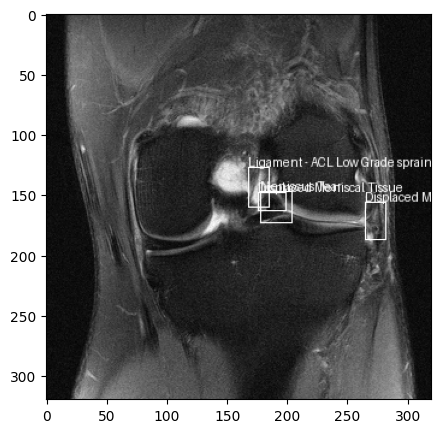

In [5]:
# Display an imageslice with annotations

slice_choice = 25
labels_for_slice = labels_for_file.loc[labels_for_file['slice'] == slice_choice].values.tolist()
arrimg = np.squeeze(img_data[slice_choice,:,:])
image_2d_scaled = (np.maximum(arrimg,0) / arrimg.max()) * 255.0
image_2d_scaled = Image.fromarray(np.uint8(image_2d_scaled))
annotated_img = plot_bounding_box(image_2d_scaled, labels_for_slice)
plt.figure(figsize = (5,5))
plt.imshow(annotated_img,'gray')
plt.show()